## Install twint, optimus and reqs

In [13]:
!pip install --user -r requirements.txt

In [4]:
!pip install --upgrade --user -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [13]:
!mv src/twint .
!rm -r src

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("twint/")

In [4]:
import twint

In [5]:
from optimus import Optimus
op = Optimus()

## Setup twint

In [6]:
# Set up TWINT config
c = twint.Config()

In [7]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

# Search for data science tweets

In [8]:
c.Search = "data science"
# Custom output format
c.Format = "Username: {username} |  Tweet: {tweet}"
c.Limit = 1
c.Pandas = True

twint.run.Search(c)

Username: InfoProNetwork |  Tweet: IAM Platform Curated Retweet:  Via:  https://twitter.com/armaninspace  #ArtificialIntelligence (AI): What About The User Experience?  https://www.forbes.com/sites/tomtaulli/2019/04/27/artificial-intelligence-ai-what-about-the-user-experience/ … #AI #DataScience #MachineLearning #BigData #DeepLearning #Robots #IoT #ML #DL #IAMPlatform #TopInfluence #ArtificialIntelligence
Username: thisismetis |  Tweet: Seattle Data Science Career Advice: Landing a Job in The Emerald City. (Tips from Metis Seattle Career Advisor Marybeth Redmond) –  https://bit.ly/2IYjzaj  pic.twitter.com/98hMYZVxsu
Username: thisismetis |  Tweet: This webinar/workshop is designed for business leaders, data science managers, and decision makers who want to build effective AI and data science capabilities for their organization. Register here:  https://bit.ly/2GDQeQT  pic.twitter.com/xENQ0Dtv1X
Username: ihutagalung |  Tweet: Contoh yang menarik dari "sport science", kali ini dari sisi 

## Saving results into Pandas

In [9]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

In [10]:
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [11]:
available_columns()

Index(['conversation_id', 'created_at', 'date', 'day', 'hashtags', 'hour',
       'id', 'link', 'location', 'name', 'near', 'nlikes', 'nreplies',
       'nretweets', 'place', 'profile_image_url', 'quote_url', 'retweet',
       'search', 'timezone', 'tweet', 'user_id', 'user_id_str', 'username'],
      dtype='object')

In [12]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])

In [13]:
df_pd

date         username  \
0   2019-05-04 16:00:19   InfoProNetwork   
1   2019-05-04 16:00:07      thisismetis   
2   2019-05-04 16:00:02      thisismetis   
3   2019-05-04 16:00:01      ihutagalung   
4   2019-05-04 15:59:56          byLilyV   
5   2019-05-04 15:59:35   aSweetEspresso   
6   2019-05-04 15:59:06    DataPanoramic   
7   2019-05-04 15:58:58       MallaahAli   
8   2019-05-04 15:57:03     SMTechEvents   
9   2019-05-04 15:56:12  AndreF_Martins_   
10  2019-05-04 15:54:03        Egokid876   
11  2019-05-04 15:53:21       ITMaryland   
12  2019-05-04 15:52:13    AmineKorchiMD   
13  2019-05-04 15:51:33    Datascience__   
14  2019-05-04 15:51:32    Datascience__   
15  2019-05-04 15:50:07        iamjony94   
16  2019-05-04 15:48:56        BuzzTechy   
17  2019-05-04 15:48:42      benngray111   
18  2019-05-04 15:48:39  iamChuckRussell   
19  2019-05-04 15:44:12   digitalmatrix2   

                                                tweet  \
0   IAM Platform Curated Retweet:  Via:  https://t...   
1   Seattle Data Science Career Advice: Landing a ...   
2   This webinar/workshop is designed for business...   
3   Contoh yang menarik dari "sport science", kali...   
4   Complete hands-on machine learning tutorial wi...   
5   We share criminal data bases, have science and...   
6   Value of Manufacturers' Shipments for Durable ...   
7   Top #DataScience and #MachineLearning Methods ...   
8   Come check out the Santa Monica Data Science &...   
9   Great talks about the future of multimodality,...   
10  Did engineering now into data science last 5 y...   
11  Program Officer – Data Science  http://bit.ly/...   
12  “I wouldn’t call a man who uses computer scien...   
13  Building Intelligent Systems: A Guide to Machi...   
14  Deep Learning with Hadoop  http://zpy.io/e5361...   
15  7 Page Speed Stats Every Marketer Should Know ...   
16  Accelerate your business with Top Strategy cou...   
17  I would imagine I'm sunk  I'm going to do an e...   
18  #TechnoCool: How to build a data science team ...   
19  #FOLLOWBACK #FFback #InstantFollow #Blockchain...   

                                             hashtags  nlikes  
0   [#artificialintelligence, #ai, #datascience, #...       0  
1                                                  []       0  
2                                                  []       0  
3                                                  []       0  
4   [#python, #machine, #learning, #online, #data,...       0  
5                                                  []       0  
6   [#bigdata, #datascience, #housing, #rstats, #g...       0  
7               [#datascience, #machinelearning, #ai]       0  
8                                                  []       0  
9                   [#petmri, #molecularimaging, #ai]       0  
10                                                 []       0  
11                                                 []       0  
12                                         [#trading]       0  
13                                [#datascience, #ad]       0  
14                                [#datascience, #ad]       0  
15  [#socialmedia, #digitalmarketing, #contentmark...       2  
16  [#udemy, #elearning, #bigdata, #datascience, #...       4  
17                                                 []       0  
18  [#technocool, #tech, #technology, #datascience...       1  
19  [#followback, #ffback, #instantfollow, #blockc...       1

# Sentiment analysis

## Save data to Optimus

In [15]:
df = op.create.data_frame(pdf= df_pd)

### Clean tweets

In [16]:
clean_tweets = df.cols.remove_accents("tweet") \
                 .cols.remove_special_chars("tweet")

In [17]:
clean_tweets.count()

20

In [18]:
tweets = clean_tweets.select("tweet").rdd.flatMap(lambda x: x).collect()

In [19]:
tweets

['IAM Platform Curated Retweet  Via  httpstwittercomarmaninspace  ArtificialIntelligence AI What About The User Experience  httpswwwforbescomsitestomtaulli20190427artificialintelligenceaiwhatabouttheuserexperience  AI DataScience MachineLearning BigData DeepLearning Robots IoT ML DL IAMPlatform TopInfluence ArtificialIntelligence',
 'Seattle Data Science Career Advice Landing a Job in The Emerald City Tips from Metis Seattle Career Advisor Marybeth Redmond –  httpsbitly2IYjzaj  pictwittercom98hMYZVxsu',
 'This webinarworkshop is designed for business leaders data science managers and decision makers who want to build effective AI and data science capabilities for their organization Register here  httpsbitly2GDQeQT  pictwittercomxENQ0Dtv1X',
 'Contoh yang menarik dari sport science kali ini dari sisi statistik dan pemetaan lapangan Dengan makin gencarnya scientific method masuk di sport maka pengolahan data seperti ini akan semakin menjadi hal biasa  httpslnkdinfQHqgjh ',
 'Complete han

### Analyze sentiment of tweets

In [20]:
from textblob import TextBlob
from IPython.display import Markdown, display

In [21]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [23]:
for tweet in tweets:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        printmd('Positive', color="green")
    elif analysis.sentiment[0]<0:
        printmd('Negative', color="red")
    else:
        printmd("Neutral", color="grey")
        print("")

IAM Platform Curated Retweet  Via  httpstwittercomarmaninspace  ArtificialIntelligence AI What About The User Experience  httpswwwforbescomsitestomtaulli20190427artificialintelligenceaiwhatabouttheuserexperience  AI DataScience MachineLearning BigData DeepLearning Robots IoT ML DL IAMPlatform TopInfluence ArtificialIntelligence
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>


Seattle Data Science Career Advice Landing a Job in The Emerald City Tips from Metis Seattle Career Advisor Marybeth Redmond –  httpsbitly2IYjzaj  pictwittercom98hMYZVxsu
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>


This webinarworkshop is designed for business leaders data science managers and decision makers who want to build effective AI and data science capabilities for their organization Register here  httpsbitly2GDQeQT  pictwittercomxENQ0Dtv1X
Sentiment(polarity=0.6, subjectivity=0.8)


<span style='color:green'>Positive</span>

Contoh yang menarik dari sport science kali ini dari sisi statistik dan pemetaan lapangan Dengan makin gencarnya scientific method masuk di sport maka pengolahan data seperti ini akan semakin menjadi hal biasa  httpslnkdinfQHqgjh 
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>


Complete handson machine learning tutorial with data science Tensorflow artificial intelligence and neural networks  Machine Learning Data Science and Deep Learning with Python   httpsmedia4yousocialcareerdevelopmenthtmlmachinelearning  python machine learning online data science udemy elearning pictwittercomqgGVzRUFAM
Sentiment(polarity=-0.16666666666666666, subjectivity=0.6)


<span style='color:red'>Negative</span>

We share criminal data bases have science and medical collaoarations Freedom of movement means we can live and work in EU countries with no hassle at all much easier if youre from a poorer background We have Erasmus loads more good things
Sentiment(polarity=0.18939393939393936, subjectivity=0.39166666666666666)


<span style='color:green'>Positive</span>

Value of Manufacturers Shipments for Durable Goods BigData DataScience housing rstats ggplot pictwittercomXy0UIQtNHy
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>


Top DataScience and MachineLearning Methods Used in 2018 2019 AI MoRebaie TMounaged AINow6 JulezNorton  httpswwwkdnuggetscom201904topdatasciencemachinelearningmethods20182019html 
Sentiment(polarity=0.5, subjectivity=0.5)


<span style='color:green'>Positive</span>

Come check out the Santa Monica Data Science  Artificial Intelligence meetup to learn about In PersonComplete Handson Machine Learning Tutorial with Data Science  httpbitly2IRh0GU 
Sentiment(polarity=-0.6, subjectivity=1.0)


<span style='color:red'>Negative</span>

Great talks about the future of multimodality clinical translation and data science Very inspiring 1stPETMRIsymposium unitue PETMRI molecularimaging AI pictwittercomO542P9PKXF
Sentiment(polarity=0.4833333333333334, subjectivity=0.625)


<span style='color:green'>Positive</span>

Did engineering now into data science last 5 years and doing MSC in data science this year
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)


<span style='color:grey'>Neutral</span>


Program Officer – Data Science  httpbitly2PV3ROF 
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>


“I wouldn’t call a man who uses computer science to sift vast amounts of data for correlation and then starts trading the correlation and if it works keeps going and if it doesn’t stops I wouldn’t call him an investor Charlie Munger ⁦WSJ⁩ httpswwwwsjcomarticlescharliemungerunplugged11556935195 
Sentiment(polarity=0.0, subjectivity=1.0)


<span style='color:grey'>Neutral</span>


Building Intelligent Systems A Guide to Machine Learning Engineering  httpzpyio5a3a0efd  datascience ad
Sentiment(polarity=0.8, subjectivity=0.9)


<span style='color:green'>Positive</span>

Deep Learning with Hadoop  httpzpyioe5361664  datascience ad
Sentiment(polarity=0.0, subjectivity=0.4)


<span style='color:grey'>Neutral</span>


7 Page Speed Stats Every Marketer Should Know  httpbitly2SRvQii  socialmedia digitalmarketing contentmarketing growthhacking SEO SMM ecommerce marketing influencermarketing blogging infographic deeplearning ai machinelearning bigdata datascience fintech pictwittercome9LVuMcfva
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>


Accelerate your business with Top Strategy courses at 1099  Promo Code UDEAFFBSC519  👉  httpbitly2IZWMLV  Udemy eLearning BigData DataScience MachineLearning IoT IIoT PyTorch Python RStats TensorFlow Java JavaScript ReactJS GoLang Serverless Linux pictwittercomwnuVw9atSl
Sentiment(polarity=0.5, subjectivity=0.5)


<span style='color:green'>Positive</span>

I would imagine Im sunk  Im going to do an experiential analysis of the social costs of my lifestyle and try to figure out how much my state of mind costs to maintain and how to pay for that in the aggregate using citizen data scienceand also how to slowly ease the bubbles
Sentiment(polarity=-0.022222222222222237, subjectivity=0.2222222222222222)


<span style='color:red'>Negative</span>

TechnoCool How to build a data science team  TechRepublic  tech technology datascience neuralnetworks ai ml agi  Read More Here httpswwwtechrepubliccomarticlehowtobuildadatascienceteam 
Sentiment(polarity=0.5, subjectivity=0.5)


<span style='color:green'>Positive</span>

FOLLOWBACK FFback InstantFollow Blockchain tech innovation Innovators innovate CloudComputing api data Entrepreneur Clinical saas businessintielligence clinical analytics ai bi datascience streaming DigitalTransformation healthcare api DevOps pictwittercomLM1b7zcaOI
Sentiment(polarity=0.0, subjectivity=0.0)


<span style='color:grey'>Neutral</span>

## Add sentiments to dataframe

In [24]:
from pyspark.sql.functions import udf

In [25]:
def apply_blob(sentence):
    temp = TextBlob(sentence).sentiment[0]
    if temp == 0.0:
        return 0.0 # Neutral
    elif temp >= 0.0:
        return 1.0 # Positive
    else:
        return 2.0 # Negative

In [26]:
sentiment = udf(apply_blob)

In [29]:
clean_tweets.withColumn("sentiment", sentiment(clean_tweets['tweet'])).show()

+-------------------+---------------+--------------------+--------------------+------+---------+
|               date|       username|               tweet|            hashtags|nlikes|sentiment|
+-------------------+---------------+--------------------+--------------------+------+---------+
|2019-05-04 16:00:19| InfoProNetwork|IAM Platform Cura...|[#artificialintel...|     0|      0.0|
|2019-05-04 16:00:07|    thisismetis|Seattle Data Scie...|                  []|     0|      0.0|
|2019-05-04 16:00:02|    thisismetis|This webinarworks...|                  []|     0|      1.0|
|2019-05-04 16:00:01|    ihutagalung|Contoh yang menar...|                  []|     0|      0.0|
|2019-05-04 15:59:56|        byLilyV|Complete handson ...|[#python, #machin...|     0|      2.0|
|2019-05-04 15:59:35| aSweetEspresso|We share criminal...|                  []|     0|      1.0|
|2019-05-04 15:59:06|  DataPanoramic|Value of Manufact...|[#bigdata, #datas...|     0|      0.0|
|2019-05-04 15:58:58|     Mall

# Making the code modular

## Setup everything

In [1]:
%load_ext autoreload
%autoreload 2

# Import twint
import sys
sys.path.append("twint/")

# Set up TWINT config
import twint
c = twint.Config()

# Other imports
import seaborn as sns
import os
from optimus import Optimus
op = Optimus()

# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

# Disable annoying printing

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

/opt/conda/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## The code with the magic

In [2]:
from textblob import TextBlob
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# Function to get sentiment 
def apply_blob(sentence):
    temp = TextBlob(sentence).sentiment[0]
    if temp == 0.0:
        return 0.0 # Neutral
    elif temp >= 0.0:
        return 1.0 # Positive
    else:
        return 2.0 # Negative

# UDF to write sentiment on DF
sentiment = udf(apply_blob, DoubleType())

# Transform result to pandas
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

def tweets_sentiment(search, limit=1):
    c.Search = search
    # Custom output format
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Limit = limit
    c.Pandas = True
    with HiddenPrints():
        print(twint.run.Search(c))
    
    # Transform tweets to pandas DF
    df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])
    
    # Transform Pandas DF to Optimus/Spark DF
    df = op.create.data_frame(pdf= df_pd)
    
    # Clean tweets
    clean_tweets = df.cols.remove_accents("tweet") \
                 .cols.remove_special_chars("tweet")
    
    # Add sentiment to final DF
    return clean_tweets.withColumn("sentiment", sentiment(clean_tweets['tweet']))

In [3]:
df_result = tweets_sentiment("data science", limit=1)

In [4]:
df_result.show()

+-------------------+---------------+--------------------+--------------------+------+---------+
|               date|       username|               tweet|            hashtags|nlikes|sentiment|
+-------------------+---------------+--------------------+--------------------+------+---------+
|2019-05-04 17:43:36|  alexssandroos|Caros de DataScie...|[#datascience, #p...|     0|      0.0|
|2019-05-04 17:40:23|   DS_Analytics|WorldCover raises...|[#datascience, #m...|     0|      2.0|
|2019-05-04 17:40:05|      iamjony94|12 Free Social Me...|[#socialmedia, #d...|     0|      1.0|
|2019-05-04 17:35:36|      Rbloggers|Fast food causali...|[#rstats, #datasc...|     1|      1.0|
|2019-05-04 17:34:26|  Datascience__|Data Science at t...|      [#datascience]|     0|      0.0|
|2019-05-04 17:34:26|  Datascience__|Notes from Course...|     [#deeplearning]|     0|      0.0|
|2019-05-04 17:34:25|  Datascience__|How to prepare fo...|[#machinelearning...|     0|      2.0|
|2019-05-04 17:34:19|   oliver

In [5]:
df_result.count()

16

In [36]:
df_result.printSchema()

root
 |-- date: string (nullable = true)
 |-- username: string (nullable = true)
 |-- tweet: string (nullable = true)
 |-- hashtags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nlikes: long (nullable = true)
 |-- sentiment: double (nullable = true)



### Lets see the distribution of the sentiments

In [37]:
df_res_pandas = df_result.toPandas()

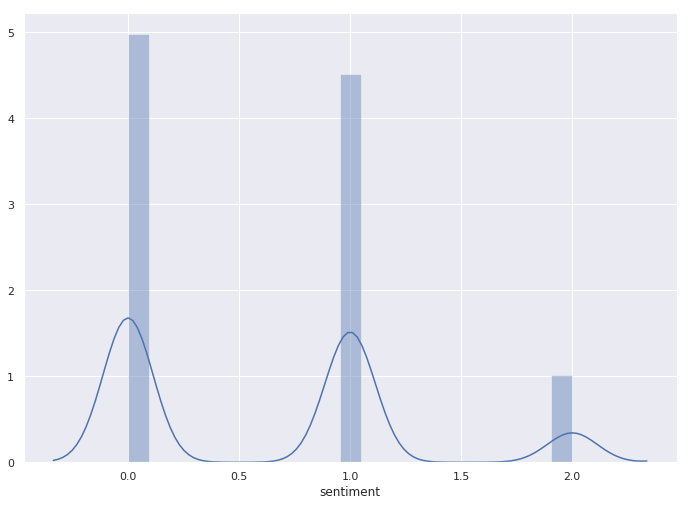

In [46]:
sns.distplot(df_res_pandas['sentiment'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Lets do more with Twint

In [30]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append("twint/")

import twint
import numpy as np
from PIL import Image
from os import path

# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# Disable annoying printing

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

## Get tweets easily

In [3]:
def get_tweets(search, limit=100):
    c = twint.Config()
    c.Search = search
    c.Limit = limit
    c.Pandas = True
    c.Pandas_clean = True

    with HiddenPrints():
        print(twint.run.Search(c))
    return twint.output.panda.Tweets_df[["username","tweet"]]

In [4]:
tweets = get_tweets("data science", limit=10000)

In [5]:
tweets.count()

username    10003
tweet       10003
dtype: int64

## Generate word cloud

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

text = tweets.tweet.values

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("xa0")
stopwords.add("xa0'")
stopwords.add("bitly")
stopwords.add("bit")
stopwords.add("ly")
stopwords.add("twitter")
stopwords.add("pic")

wordcloud = WordCloud(
    background_color = 'black',
    width = 1000,
    height = 500,
    stopwords = stopwords).generate(str(text))

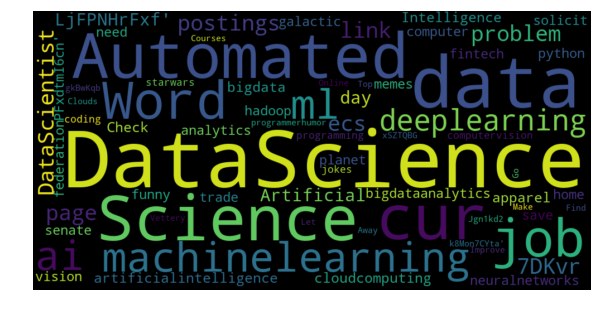

In [8]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [10, 10]

In [12]:
def generate_word_cloud(tweets):
    
    # Getting the text out of the tweets
    text = tweets.tweet.values
    
    # adding movie script specific stopwords
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("xa0")
    stopwords.add("xa0'")
    stopwords.add("bitly")
    stopwords.add("bit")
    stopwords.add("ly")
    stopwords.add("twitter")
    stopwords.add("pic")

    wordcloud = WordCloud(
        background_color = 'black',
        width = 1000,
        height = 500,
        stopwords = stopwords).generate(str(text))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.rcParams['figure.figsize'] = [10, 10]

## Other example

In [14]:
tweets = get_tweets("artificial intelligence", limit=1000)

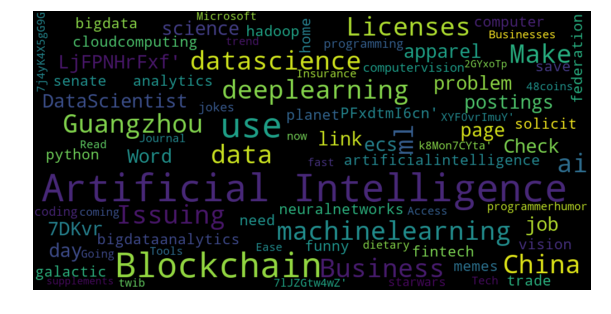

In [15]:
generate_word_cloud(tweets)

## Scaling up

In [6]:
df_result = tweets_sentiment("data science", limit=10000)
df_result.show()

+-------------------+---------------+--------------------+--------------------+------+---------+
|               date|       username|               tweet|            hashtags|nlikes|sentiment|
+-------------------+---------------+--------------------+--------------------+------+---------+
|2019-05-04 17:43:36|  alexssandroos|Caros de DataScie...|[#datascience, #p...|     0|      0.0|
|2019-05-04 17:40:23|   DS_Analytics|WorldCover raises...|[#datascience, #m...|     0|      2.0|
|2019-05-04 17:40:05|      iamjony94|12 Free Social Me...|[#socialmedia, #d...|     0|      1.0|
|2019-05-04 17:35:36|      Rbloggers|Fast food causali...|[#rstats, #datasc...|     1|      1.0|
|2019-05-04 17:34:26|  Datascience__|Data Science at t...|      [#datascience]|     0|      0.0|
|2019-05-04 17:34:26|  Datascience__|Notes from Course...|     [#deeplearning]|     0|      0.0|
|2019-05-04 17:34:25|  Datascience__|How to prepare fo...|[#machinelearning...|     0|      2.0|
|2019-05-04 17:34:19|   oliver

In [7]:
df_result.count()

10031